### ** Trees: Ensemble Methods - Bagging

Bagging: Training a bunch of individual models in a parallel way. Each model is trained by a random subset of the data. (Summary!)

BAGGing stands for Bootstrapping(sampling with replacement) and AGGregating (Averaging predictions).

With Random Forest in addition to taking the random subset of data, it also takes the random selection of features rather than using all features to grow trees. When you have many random trees. It’s called Random Forest.

With Random Forest, our goal is to reduce the variance of a decision Tree. We end up with an ensemble of different models. Average of all the predictions from different trees are used which is more robust than a single decision tree.

- forests = high variance, low bias base learners
- Bagging to decrease the model’s variance

<img src="./images/boostrap_aggregating.png" width="500" height="500" />

### <strong> Extremely Randomized Trees </strong>

Extremely Randomized Trees, abbreviated as ExtraTrees in Sklearn, adds one more step of randomization to the random forest algorithm. 

Random forests will 

1. compute the optimal split to make for each feature within the randomly selected subset, and it will then choose the best feature to split on. 
2. builds multiple trees with bootstrap = True (by default), which means it samples replacement.

ExtraTrees on the other hand(compared to Random Forests) will instead choose a random split to make for each feature within that random subset, and it will subsequently choose the best feature to split on by comparing those randomly chosen splits. (nodes are split on random splits, not best splits.)

Like random forest, the Extra Trees algorithm will randomly sample the features at each split point of a decision tree. Unlike random forest, which uses a greedy algorithm to select an optimal split point, the Extra Trees algorithm selects a split point at random.

In terms of computational cost, and therefore execution time, the Extra Trees algorithm is faster. This algorithm saves time because the whole procedure is the same, but it randomly chooses the split point and does not calculate the optimal one.

Extremely randomized trees are much more computationally efficient than random forests, and their performance is almost always comparable. In some cases, they may even perform better!

![Bagging](./images/rf_extra.png)

Link to Paper: https://link.springer.com/content/pdf/10.1007/s10994-006-6226-1.pdf

In [1]:
#import libraries
import pandas as pd
import numpy as numpy

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import f1_score, confusion_matrix

In [2]:
#load dataset

X,y = load_iris(return_X_y=True)

#train,test split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

#random forest with gini
rf = RandomForestClassifier(criterion='gini',n_estimators=150,max_depth=4,n_jobs=-1)

rf.fit(X_train,y_train)  #fit on the data

rf_predict = rf.predict(X_test)

f1_score(y_test, rf_predict, average=None)

array([1., 1., 1.])

In [3]:
#random forest with gini
rf = RandomForestClassifier(criterion='entropy',n_estimators=200,max_depth=4,n_jobs=-1)

rf.fit(X_train,y_train)

rf_predict = rf.predict(X_test)

f1_score(y_test, rf_predict, average=None)

array([1., 1., 1.])

Example: https://shoe-size-predict.herokuapp.com/

Exercise: Using the data in scout_data, build a model to predict a product tier(Classification) and a model to predict the number of detail views.(Regression)

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix

In [15]:
df = pd.read_csv('./data/scout_data/carsearch_cleaned.csv')
df

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,live_days,first_registration_age
0,350625839,Basic,Mitsubishi,16750,5,2013,2018-07-24,2018-08-24,3091.0,123.0,30,0.037803,31,9
1,350266763,Basic,Ford,1750,6,2003,2018-07-20,2018-10-29,1856.0,26.0,101,0.014009,101,19
2,361204569,Basic,Volkswagen,24890,6,2017,2018-10-20,2018-10-22,125.0,6.0,2,0.048000,2,5
3,362784907,Basic,Fiat,2850,7,2008,2018-08-11,2018-09-11,172.0,4.0,1,0.022093,31,14
4,363942101,Basic,Renault,23740,2,2018,2018-11-20,2019-02-15,1499.0,99.0,87,0.062742,87,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54677,362849394,Basic,BMW,3999,8,2005,2018-08-11,2018-12-28,7149.0,189.0,50,0.025115,139,17
54678,358558328,Basic,Ford,3297,3,2008,2018-09-20,2018-09-24,604.0,34.0,4,0.056291,4,14
54679,359231940,Basic,Hyundai,2950,6,2006,2018-09-28,2018-10-23,1175.0,16.0,25,0.012936,25,16
54680,362425932,Basic,Volkswagen,7850,8,2014,2018-04-11,2018-11-21,448.0,21.0,16,0.046875,224,8


In [ ]:
df

In [95]:
set(df.article_id.value_counts())

{1}

In [94]:
set(list(df.first_registration_year == 2022))

{False}

In [ ]:
df.duplicated().value_counts()

In [25]:
data_desc = pd.read_csv('./data/scout_data/Data_Description.csv', sep=';')
data_desc

,column name,description
0,article_id,unique article identifier
1,product_tier,premium status of the article
2,make_name,name of the car manufacturer
3,price,price of the article
4,first_zip_digit,first digit of the zip code of the region the ...
5,first_registration_year,year of the first registration of the article
6,created_date,creation date of the listing
7,deleted_date,deletion date of the listing
8,search_views,number of times the article has been shown as ...
9,detail_views,number of times the article has been clicked on


In [30]:
print('Number of article_id:', len(list(df.article_id.unique())))
print('Type Product Tier:', list(df.product_tier.unique()))
print('Number of Make Name:', len(list(df.make_name.unique())))

Number of article_id: 54682
Type Product Tier: ['Basic', 'Premium', 'Plus']
Number of Make Name: 89


In [53]:
df_new = df[['product_tier', 'make_name', 'price', 'first_zip_digit', 'search_views', 'detail_views', 'stock_days', 'ctr', 'live_days', 'first_registration_age']]

In [54]:
df_new.head()

,product_tier,make_name,price,first_zip_digit,search_views,detail_views,stock_days,ctr,live_days,first_registration_age
0,Basic,Mitsubishi,16750,5,3091.0,123.0,30,0.037803,31,9
1,Basic,Ford,1750,6,1856.0,26.0,101,0.014009,101,19
2,Basic,Volkswagen,24890,6,125.0,6.0,2,0.048000,2,5
3,Basic,Fiat,2850,7,172.0,4.0,1,0.022093,31,14
4,Basic,Renault,23740,2,1499.0,99.0,87,0.062742,87,4


In [55]:
le = LabelEncoder()  #instantiate the Label Encoder
df_new['product_tier'] = le.fit_transform(df_new['product_tier'])
df_new['make_name'] = le.fit_transform(df_new['make_name'])

C:\Users\DAnand\anaconda3\envs\fund\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\DAnand\anaconda3\envs\fund\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
df_new.head()

,product_tier,make_name,price,first_zip_digit,search_views,detail_views,stock_days,ctr,live_days,first_registration_age
0,0,61,16750,5,3091.0,123.0,30,0.037803,31,9
1,0,33,1750,6,1856.0,26.0,101,0.014009,101,19
2,0,86,24890,6,125.0,6.0,2,0.048000,2,5
3,0,32,2850,7,172.0,4.0,1,0.022093,31,14
4,0,72,23740,2,1499.0,99.0,87,0.062742,87,4


In [57]:
X = df_new.drop('product_tier', axis=1)
y = df.product_tier

In [58]:
#train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

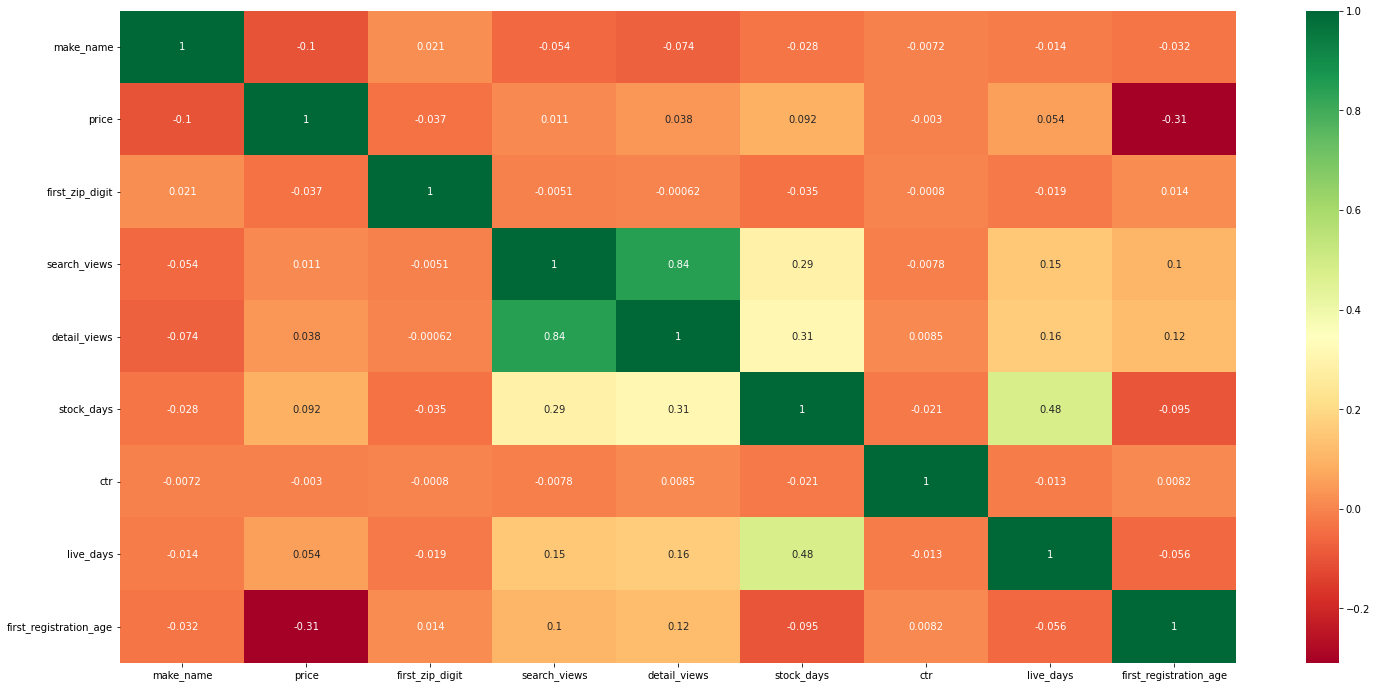

In [59]:
#get correlations of each features in dataset
corrmat = X.corr()   #get correlations table
top_corr_features = corrmat.index
plt.figure(figsize=(25,12))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [72]:
X.describe()

,make_name,price,first_zip_digit,search_views,detail_views,stock_days,ctr,live_days,first_registration_age
count,54682.000000,54682.000000,54682.000000,54682.000000,54682.000000,54682.000000,54682.000000,54682.000000,54682.000000
mean,56.732069,15199.511247,4.608646,2435.462072,98.848286,38.996690,0.048350,81.732618,10.895450
std,25.764658,16403.226836,2.357797,6266.250369,219.018732,34.161531,0.390837,86.373135,6.616951
min,0.000000,101.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,33.000000,5850.000000,3.000000,375.000000,13.000000,9.000000,0.024160,19.000000,7.000000
50%,66.000000,10950.000000,5.000000,984.000000,39.000000,30.000000,0.037621,56.000000,9.000000
75%,77.000000,18900.000000,7.000000,2465.000000,102.000000,62.000000,0.057471,117.000000,14.000000
max,88.000000,249888.000000,9.000000,608754.000000,12286.000000,127.000000,87.500000,600.000000,98.000000


In [73]:
#initialize the decisiontreeclassifier
dtc = tree.DecisionTreeClassifier(max_depth=5,random_state=42,criterion='entropy')
#criterion is the function to measure the quality of a split.
#fit and return f1_score
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
# f1_score(y_test,,average=None)
f1_score(y_test, y_pred, average = 'macro')

0.4380139344086627

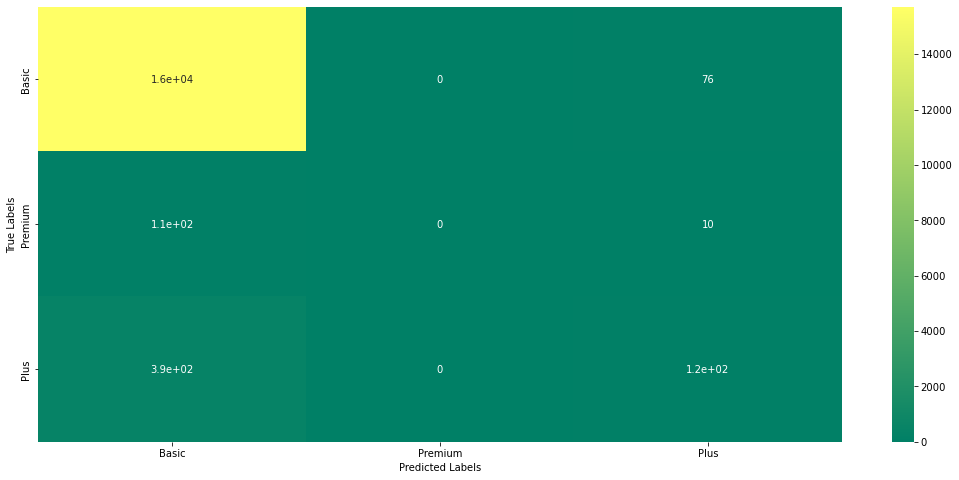

In [77]:
plt.figure(figsize = (18,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique(), cmap = 'summer')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [105]:
#random forest with gini
rf = RandomForestClassifier(criterion='gini',n_estimators=15, n_jobs=-1)

rf.fit(X_train,y_train)  #fit on the data

rf_predict = rf.predict(X_test)

f1_score(y_test, rf_predict, average='macro')

0.48831659761768464

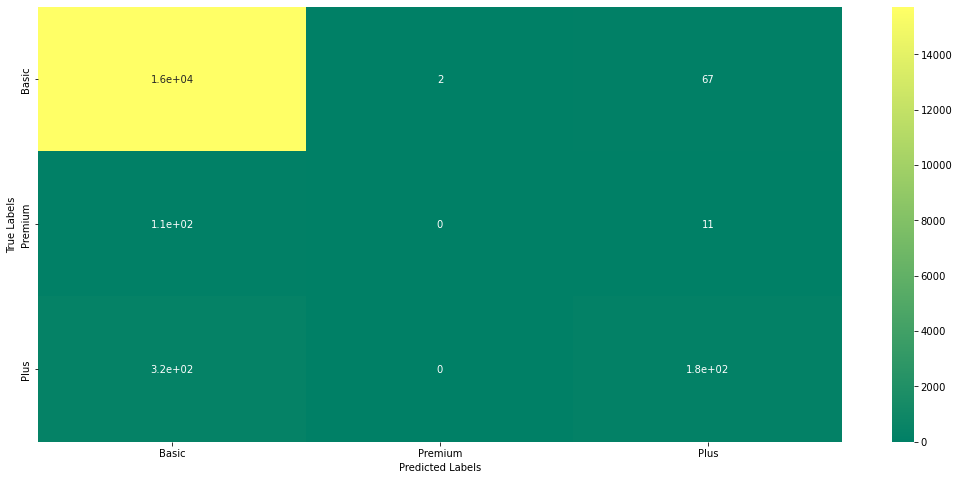

In [106]:
plt.figure(figsize = (18,8))
sns.heatmap(confusion_matrix(y_test, rf_predict), annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique(), cmap = 'summer')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [130]:
#random forest with gini
rf = RandomForestClassifier(criterion='entropy',n_estimators=15, n_jobs=-1)

rf.fit(X_train,y_train)  #fit on the data

rf_predict = rf.predict(X_test)

f1_score(y_test, rf_predict, average='macro')

0.5046063734444072

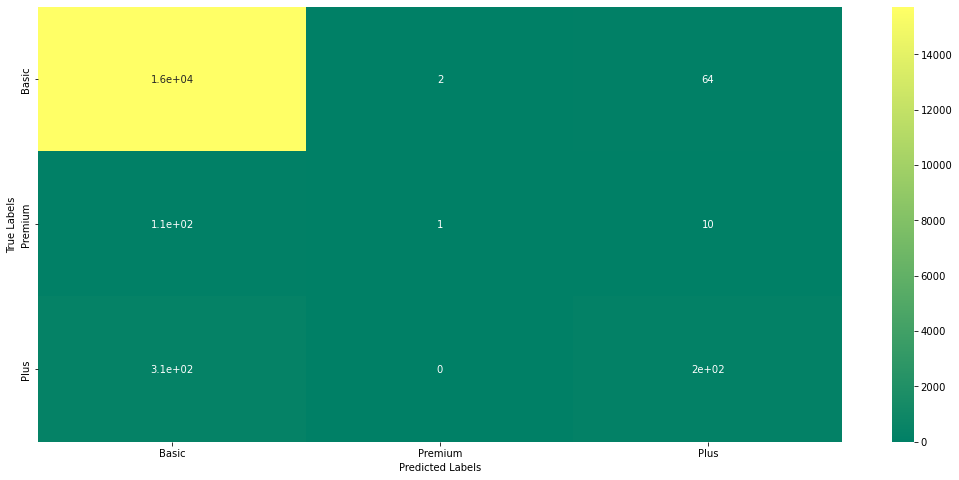

In [131]:
plt.figure(figsize = (18,8))
sns.heatmap(confusion_matrix(y_test, rf_predict), annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique(), cmap = 'summer')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Solution